<a href="https://colab.research.google.com/github/Maryleen/Even-food-distribution-to-eradicate-hunger-and-wastage/blob/master/Recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solution 2: Farmer-Consumer matching

In [ ]:
#Set up python packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score


## Data preparation

We will generate a fake profile dataset of farmers and consumers using features they will enter in the recommender app.

In [ ]:
# List of potential farmer-consumer matching questions/categories

qs = ['Location', #where is the farmer/consumer located
      'Food_Type', #the different types of produce available on the platform
      'Present_condition', #Produce state whether fresh or stale [some people use stale ones for feed for livestock.... thats one of the reasons to that ]
      'How_soon', #how soon can it be delivered / how soon does consumer want it
      'Quantity', #how many do you have in stock / how many do you want to buy?
      'User_type' #farmer or consumer [This is needed to place constraints on the algorithm to ensure that there must be at least x no of farmers in a cluster and that it doesn't create consumer only clusters]
      ]

#create dataframe for questions/categories
data_rows = 5000  #number of rows in the dataset
cat_df = pd.DataFrame(columns=qs) #define the dataframe

cat_df.head()

#Filling with random data

for i in cat_df.columns:
  #categorical values ranging from 0 to 5 with 5 being the highest in the scale
  if i=='Location':
    cat_df[i] = np.random.randint(0,35, data_rows)   #one of the 36 states of the country
  elif i=='User_type':
    cat_df[i] = np.random.randint(0,1, data_rows)    
  else:
    cat_df[i] = np.random.randint(0,5, data_rows)


In [ ]:
cat_df

,Location,Food_Type,Present_condition,How_soon,Quantity,User_type
0,31,2,3,2,0,0
1,31,4,4,1,4,0
2,15,3,1,2,1,0
3,4,0,0,4,1,0
4,32,4,3,2,3,0
...,...,...,...,...,...,...
4995,29,2,0,4,3,0
4996,16,1,3,0,0,0
4997,9,2,2,4,2,0
4998,8,4,2,3,1,0


## Model building

We will be building a clustering model here. One hyperparameter it requires is the number of clusters. We will evaluate this and choose the best number of clusters using the silhouette score and the davies bouldin score.

The silhouette score measures how similar data points are to their own cluster (cohesion) compared to others (separation) and ranges from -1 to 1 (worse to best).

For Davies bouldin score, clusters that are far apart and less dispersed give better scores. The minimum value is 0 with lower values indicating better clustering

In [ ]:
#setting the number of clusters to evaluate
count = [k for k in range (2,40,1)]

#list to store the evaluationscores
s_score =[] # silhouette score empty list
db_score = [] #davies bouldin score empty list

for k in count:

  #KMeans clustering with different k clusters
  kmeans = KMeans(k, init='k-means++')
  kmeans.fit(cat_df)
  y_pred = kmeans.predict(cat_df)

  #agglo_cl = AgglomerativeClustering(k)
  #agglo_cl.fit(cat_df)
  #y_pred = agglo_cl.labels_


  s_score.append(silhouette_score(cat_df,y_pred))
  db_score.append(davies_bouldin_score(cat_df,y_pred))

<function matplotlib.pyplot.show>

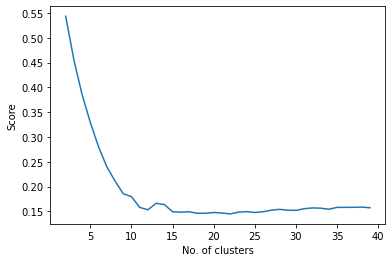

In [ ]:
plt.plot(count, s_score)
plt.xlabel('No. of clusters')
plt.ylabel('Score')
plt.show

<function matplotlib.pyplot.show>

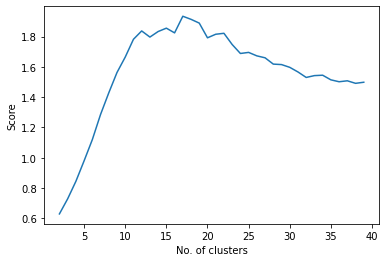

In [ ]:
plt.plot(count, db_score)
plt.xlabel('No. of clusters')
plt.ylabel('Score')
plt.show

Based on the evaluation scores, we will choose 17 as the number of clusters

In [ ]:
#Building the model with the evaluated best number of clusters

n_clusters = 17
k_means = KMeans(n_clusters=n_clusters)
k_means.fit(cat_df)
y_pred = k_means.predict(cat_df)

In [ ]:
cat_df['Cluster No.'] = y_pred

In [ ]:
cat_df

,Location,Food_Type,Present_condition,How_soon,Quantity,User_type,Cluster No.
0,31,2,3,2,0,0,1
1,31,4,4,1,4,0,1
2,15,3,1,2,1,0,15
3,4,0,0,4,1,0,12
4,32,4,3,2,3,0,10
...,...,...,...,...,...,...,...
4995,29,2,0,4,3,0,1
4996,16,1,3,0,0,0,0
4997,9,2,2,4,2,0,16
4998,8,4,2,3,1,0,4


## Visualisation of farmer-consumer matching

Create a column of user id - 0 or 1 for farmer/consumer
Visualise with different colors for farmers and consumers

In [ ]:
#In the event that some consumers get matched with consumers, how do we solve this?
#wouldn't be an issue if there is a cluster(community) of consumer/farmer and they are evenly dstributed. But what if it creates a cluster of only consumers or farmers?



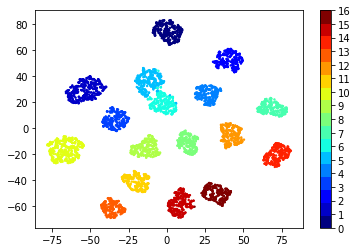

In [ ]:
from sklearn import manifold
def visualizeData(Z, label, n_clusters):
  labels = y_pred.astype(int)  #convert the labels to interget
  tsne = manifold.TSNE (n_components=2, init='pca',random_state=0)
  Z_tsne = tsne.fit_transform(Z)
  fig=plt.figure()
  plt.scatter(Z_tsne[:,0], Z_tsne[:,1], s=2, c=label,cmap=plt.cm.get_cmap("jet",n_clusters))
  plt.colorbar(ticks=range(n_clusters))

visualizeData(cat_df, y_pred, n_clusters)